# Random Forest Classifier On Heart Disease

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [8]:
# Data collection
df = pd.read_csv('data_heart_disease.csv')

In [3]:
print(df)

     age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1  NaN       145   233    1        0      150      0      2.3   
1     37    1    2       130   250    0        1      187      0      3.5   
2     41    0    1       130   204    0        0      172      0      1.4   
3     56    1    1       120   236    0        1      178      0      0.8   
4     57    0    0       120   354    0        1      163      1      0.6   
..   ...  ...  ...       ...   ...  ...      ...      ...    ...      ...   
298   57    0    0       140   241    0        1      123      1      0.2   
299   45    1    3       110   264    0        1      132      0      1.2   
300   68    1    0       144   193    1        1      141      0      3.4   
301   57    1    0       130   131    0        1      115      1      1.2   
302   57    0    1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   

In [4]:
# Seperate feature space X and label y

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
# Display X and y

print("X:\n", X)
print("++++++++++++")
print("y:\n", y)

X:
      age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1  NaN       145   233    1        0      150      0      2.3   
1     37    1    2       130   250    0        1      187      0      3.5   
2     41    0    1       130   204    0        0      172      0      1.4   
3     56    1    1       120   236    0        1      178      0      0.8   
4     57    0    0       120   354    0        1      163      1      0.6   
..   ...  ...  ...       ...   ...  ...      ...      ...    ...      ...   
298   57    0    0       140   241    0        1      123      1      0.2   
299   45    1    3       110   264    0        1      132      0      1.2   
300   68    1    0       144   193    1        1      141      0      3.4   
301   57    1    0       130   131    0        1      115      1      1.2   
302   57    0    1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2 

In [6]:
# split data into train + test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Lets look at size of train and test
print(X_train.shape)
print(X_test.shape)

(242, 13)
(61, 13)


In [16]:
# select and train  the model

model= RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# (SKIP)See all the parameters that are used
for key, value in model.get_params().items():
    print(f"{key}: {value}")

bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


In [27]:
# Evaluate the model: Check the accuracy
y_predict = model.predict(X_test)

accuracy = accuracy_score(y_predict, y_test)
print('Accuracy: ',accuracy)

Accuracy:  0.8524590163934426


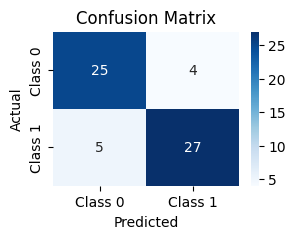

In [30]:
# Confusion matrix with raw numbers
cm = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

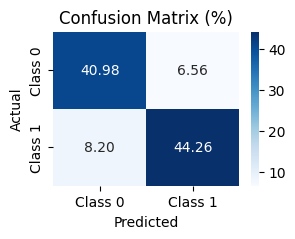

In [33]:
# (OPTIONAL)I want to see the percentage 
cm = confusion_matrix(y_test, y_predict)

# Convert to percentages
cm_percent = cm / np.sum(cm) * 100

# Plot the confusion matrix in percentages
plt.figure(figsize=(3, 2))
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap="Blues", 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (%)")
plt.show()

### Random forest classifier helped in achieving accuracy upto 85 % which is very good considering the size and quality of data

# Hyperparameter tuning: Lets find the best parameter

In [37]:
# Took long time: 4 min.
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',      # or 'f1', 'precision', etc.
    n_jobs=-1,               # use all CPU cores
    verbose=1
)

# Fit
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [39]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Test accuracy
print("Test Accuracy:", best_model.score(X_test, y_test))

Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Test Accuracy: 0.8852459016393442


## Best model gave higher accuracy: 88.5%